# European Social Survey

In [3]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble

In [4]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 80% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 20% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null float64
year       8147 non-null int64
tvtot      8147 non-null float64
ppltrst    8147 non-null float64
pplfair    8147 non-null float64
pplhlp     8147 non-null float64
happy      8147 non-null float64
sclmeet    8147 non-null float64
sclact     8147 non-null float64
gndr       8147 non-null float64
agea       8147 non-null float64
partner    8147 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 891.1+ KB


In [14]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.147000e+03,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000
mean,4.022622e+04,6.500307,3.818584,5.574936,6.005155,5.321468,7.708482,5.215908,2.755984,1.496379,47.262182,1.384681
std,6.320721e+05,0.500031,2.008937,2.215745,2.120127,2.166217,1.720839,1.438792,0.901406,0.500018,18.316890,0.486550
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.063000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.749000e+03,7.000000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.778000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,61.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [5]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.

# *** It's best to update this table for the drill 
#  at the end of the lesson.  ***
#Include additional to params?

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params) # ** is an exponent
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

## Confusion Matrices

In [6]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'  #What's 'd'?
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


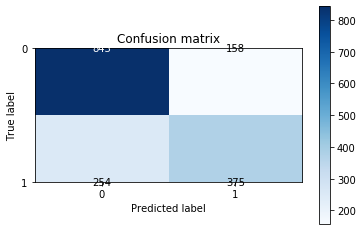

In [7]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)

### Normalized Confusion Matrix

Normalized confusion matrix


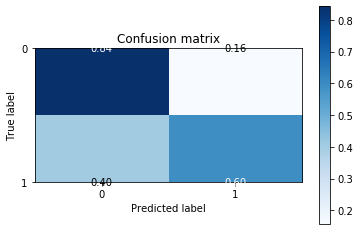

In [8]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

### Accuray Score

In [9]:
clf.score(X_test, y_test)

0.747239263803681

### Precision Score

In [10]:
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.7035647279549718

### Recall Score

In [11]:
recall_score(y_test,y_pred)

0.5961844197138315

#### Observation: Use 'feature_importance' to see how many times a certain feature was used in the newly configured decision trees. We will plot in horizontal histogram to guage, which will rank, the number of times a variable appeared. This can also be seen as level of importance. 

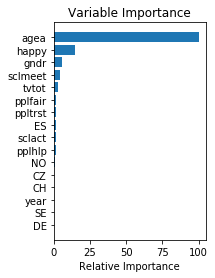

In [12]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Analysis:
It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner. The model is good. But let's see how we can lower the error rates in the test set (y_test).
Add Another Feature (no longer Binary, and cannot be a Classifier type of model).

Strategies we might use include:

~Creating new features
~Applying more overfitting-prevention strategies like subsampling
~More iterations
~Trying a different loss function
~Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications. Increased the depth of tree.

Sources: Gradient Boost ~  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
Confusion Matrix ~ https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html 

A few parameters to tune could be:

~learning_rate
~max_depth
~n_estimators
~loss
~subsample
~min_samples_split

## Second Model

In [15]:
# We'll make 750 iterations, use 4-deep trees, and set our loss function.
# Increase the n_estimators to 750 usually increases and better performance.
#Include additional to params?


params = {'n_estimators': 750,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params) # ** is an exponent
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [16]:
clf.score(X_test, y_test)

0.7386503067484662

In [17]:
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.6869244935543278

In [18]:
recall_score(y_test,y_pred)

0.5930047694753577

### Analysis: Each of our scores (accuracy, precision, and recall scores decreased. We didn't improve the performance even though increasing the 'n_estimators' usually results in better performance.

## Third Model

In [19]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params) # ** is an exponent
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [20]:
clf.score(X_test, y_test)

0.7466257668711657

### Analysis: This third model improved the second model, but not upon the first model.

## Fourth Model
We will increase 'n_estimators' to 750 and 'max_depth' to 4. We'll also increase the minimum numbers of samples required before splitting.

In [22]:
#Adjustments below
params = {'n_estimators': 750,
          'max_depth': 4,'min_samples_split': 5,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params) # ** is an exponent
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [23]:
clf.score(X_test, y_test)

0.7368098159509202